In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb


# Just a quick test to see feature importances of new variables.

In [2]:
df = pd.read_csv('../data/V2_BPD_CRIME_DATA_ENCODED.csv')


In [3]:
df.head()

,Unnamed: 0,CrimeDate,Description,Neighborhood,Premise,Month,Hour,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Holiday,Weekend
0,0,2017-09-02,11,26,69,9,23,0,0,0,1,0,0,0,1
1,1,2017-09-02,3,213,78,9,23,1,0,0,0,1,0,0,1
2,2,2017-09-02,14,267,78,9,22,1,1,0,0,0,0,0,1
3,3,2017-09-02,0,37,69,9,22,0,0,0,0,0,1,0,1
4,4,2017-09-02,5,63,78,9,22,1,0,1,0,0,0,0,1


In [4]:
df = df.drop(columns=["Unnamed: 0","CrimeDate"])


In [12]:
X = df.drop(columns = ['Description'])
Y = df['Description']
X_original = X.drop(columns=["Holiday","Weekend"])

In [6]:
from sklearn.model_selection import cross_val_score


In [17]:
clf = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1, n_estimators=100)

In [14]:
import timeit

In [18]:
start = timeit.default_timer()
scores = cross_val_score(clf, X_original, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  19.138368499999956


In [19]:
np.mean(scores)


0.3871923773679775

In [20]:
start = timeit.default_timer()
scores = cross_val_score(clf, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)


Time:  20.192230600000016


In [21]:
np.mean(scores)


0.38650009066023333

In [22]:
model1 = clf.fit(X,Y)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

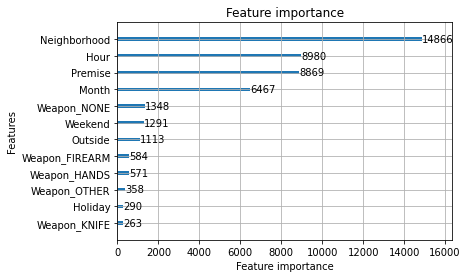

In [23]:
lgb.plot_importance(model1)

In [24]:
model2 = clf.fit(X_original,Y)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

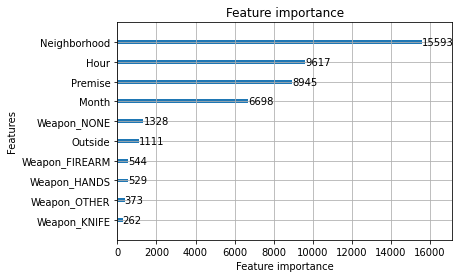

In [25]:
lgb.plot_importance(model2)


Not much better... but we'll explore some hyperparameter tuning with MLflow in another file.